In [64]:
### import necessary stuffs

In [65]:
import pandas as pd

In [66]:
df=pd.read_csv('/home/jessica/Documents/Udemy_ML_Course/Project_2_Fake_News_using_NLP-20220824T114729Z-001/Project_2_Fake_News_using_NLP/train.csv')

In [67]:
df.head()  #label, which is my target tells me if the new is fake or not

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [68]:
df.shape

(20800, 5)

In [69]:
df.isnull().sum() #valores nulos, quito las filas con valores nulos

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [70]:
## drop your missing values
df.dropna(inplace=True)

In [71]:
df.shape

(18285, 5)

In [72]:
## checking distribution of data, to see if the label is imbalance
import seaborn as sns
def create_distribution(feature):
    return sns.countplot(df[feature])

In [73]:
df.dtypes

id         int64
title     object
author    object
text      object
label      int64
dtype: object

In [74]:
df['label']=df['label'].astype(str) #convert label to string

In [75]:
df.dtypes

id         int64
title     object
author    object
text      object
label     object
dtype: object

/home/jessica/ENTER/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='label', ylabel='count'>

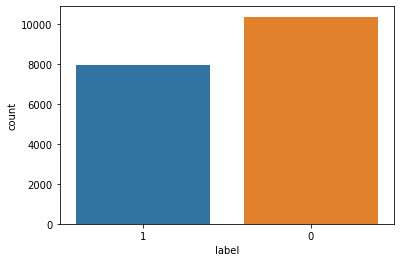

In [76]:
create_distribution('label') #there is not an imbalance

In [77]:
df.head(20) #we have to reset the index, it is not correct after deleting the rows with null values

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0
10,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0
11,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0


In [78]:
messages=df.copy()

In [79]:
#why to rset_index,bcz in above we can check,when we drop our rows get deleted as 6 and 8th so to make it in a order , we have to use reset_index

messages.reset_index(inplace=True)

In [80]:
messages.head(10)

,index,id,title,author,text,label
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
6,7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
7,9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0
8,10,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0
9,11,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0


In [81]:
messages.drop(['index','id'],axis=1,inplace=True) #new frame without the index and the id

In [82]:
messages.head()

,title,author,text,label
0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [83]:
#note we will consider only title for pre-processing

In [84]:
data=messages['title'][0]
data

'House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It'

In [85]:
import re

In [86]:
data=re.sub('[^a-zA-Z]',' ', data) #replace the special characters with space
print(data)

House Dem Aide  We Didn t Even See Comey s Letter Until Jason Chaffetz Tweeted It


In [87]:
data=data.lower() #lower case
data

'house dem aide  we didn t even see comey s letter until jason chaffetz tweeted it'

In [88]:
list=data.split()
list

['house',
 'dem',
 'aide',
 'we',
 'didn',
 't',
 'even',
 'see',
 'comey',
 's',
 'letter',
 'until',
 'jason',
 'chaffetz',
 'tweeted',
 'it']

In [89]:
!pip install nltk


In [90]:
import nltk
nltk.download('stopwords')
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/jessica/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [91]:
ps=PorterStemmer()

In [92]:
review=[ps.stem(word) for word in list if word not in set(stopwords.words('english'))]
review #words that exists in english

['hous',
 'dem',
 'aid',
 'even',
 'see',
 'comey',
 'letter',
 'jason',
 'chaffetz',
 'tweet']

In [93]:
#another way to do it, to see words that are not in english 
review=[]
for word in list:
    if word not in set(stopwords.words('english')):
        review.append(ps.stem(word)) 
review

['hous',
 'dem',
 'aid',
 'even',
 'see',
 'comey',
 'letter',
 'jason',
 'chaffetz',
 'tweet']

In [94]:
' '.join(review)

'hous dem aid even see comey letter jason chaffetz tweet'

In [95]:
### lets do same task for each & every row

In [96]:
corpus=[] #now doing the same for the whole titles
sentences=[]
for i in range(0,len(messages)):
    review=re.sub('[^a-zA-Z]',' ', messages['title'][i])
    review=review.lower()
    list=review.split()
    review=[ps.stem(word) for word in list if word not in set(stopwords.words('english'))]
    sentences=' '.join(review)
    corpus.append(sentences)

In [97]:
corpus[0]

'hous dem aid even see comey letter jason chaffetz tweet'

In [98]:
corpus

['hous dem aid even see comey letter jason chaffetz tweet',
 'flynn hillari clinton big woman campu breitbart',
 'truth might get fire',
 'civilian kill singl us airstrik identifi',
 'iranian woman jail fiction unpublish stori woman stone death adulteri',
 'jacki mason hollywood would love trump bomb north korea lack tran bathroom exclus video breitbart',
 'beno hamon win french socialist parti presidenti nomin new york time',
 'back channel plan ukrain russia courtesi trump associ new york time',
 'obama organ action partner soro link indivis disrupt trump agenda',
 'bbc comedi sketch real housew isi caus outrag',
 'russian research discov secret nazi militari base treasur hunter arctic photo',
 'us offici see link trump russia',
 'ye paid govern troll social media blog forum websit',
 'major leagu soccer argentin find home success new york time',
 'well fargo chief abruptli step new york time',
 'anonym donor pay million releas everyon arrest dakota access pipelin',
 'fbi close hilla

In [99]:
len(corpus)

18285

Creating a matrix(Bow)->Docu matrix vector->ML model->Pred

Sentences Like a vector
       it  is  going  to  rain  today i am not outside
sent1  1  1     1     1   1     1    0 0   0    0
sent2  0  0     1     0   0     1    1  1  1    1

In [100]:
## Applying Countvectorizer
# Creating the Bag of Words model

from sklearn.feature_extraction.text import CountVectorizer

In [101]:
## max_features=5000, it means I just need top 5000 features 
#example ABC News is basically 2 words,so in ngram,i have Given (1,3),so it will take the combination of 1 word,then 2 words 
#then 3 words

cv=CountVectorizer(max_features=5000,ngram_range=(1,3))

In [103]:
X=cv.fit_transform(corpus).toarray() #Converting the texts corpus into vectors

In [104]:
X.shape
#ie we get 5000 features now

(18285, 5000)

In [105]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [106]:
cv.get_feature_names()[0:20]

/home/jessica/ENTER/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['abandon',
 'abc',
 'abc news',
 'abduct',
 'abe',
 'abedin',
 'abl',
 'abort',
 'abroad',
 'absolut',
 'abstain',
 'absurd',
 'abus',
 'abus new',
 'abus new york',
 'academi',
 'accept',
 'access',
 'access pipelin',
 'access pipelin protest']

In [107]:
messages.columns

Index(['title', 'author', 'text', 'label'], dtype='object')

In [109]:
y=messages['label']
print(y)

0        1
1        0
2        1
3        1
4        1
        ..
18280    0
18281    0
18282    0
18283    1
18284    1
Name: label, Length: 18285, dtype: object


In [110]:
## Divide the dataset into Train and Test
from sklearn.model_selection import train_test_split

In [111]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.25, random_state=42)

In [112]:
X_test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [113]:
X_test.shape

(4572, 5000)

###  MultinomialNB Algo

In [114]:
#this algo works well with text data

from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()

In [115]:
classifier.fit(X_train,y_train)

MultinomialNB()

In [116]:
pred=classifier.predict(X_test)
pred

array(['1', '0', '0', ..., '0', '0', '0'], dtype='<U1')

In [117]:
from sklearn import metrics

In [118]:
metrics.accuracy_score(y_test,pred)

0.8904199475065617

In [119]:
cm=metrics.confusion_matrix(y_test,pred)
cm

array([[2301,  299],
       [ 202, 1770]])

In [120]:
import matplotlib.pyplot as plt
import numpy as np

([<matplotlib.axis.YTick at 0x7f56b8311d90>,
 [Text(0, 0, 'positive'), Text(0, 1, 'negative')])

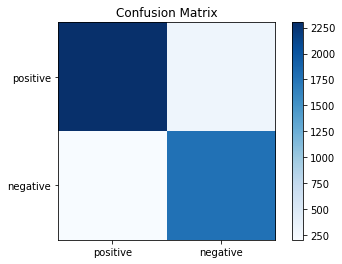

In [121]:
### make your confusion amtrix more user-friendly

plt.imshow(cm,interpolation='nearest',cmap=plt.cm.Blues)
plt.colorbar()
plt.title('Confusion Matrix')
labels=['positive','negative']
tick_marks=np.arange(len(labels))
plt.xticks(tick_marks,labels)
plt.yticks(tick_marks,labels)

In [122]:
labels=['positive','negative']
np.arange(len(labels))

array([0, 1])

In [123]:
def plot_confusion_matrix(cm):
    plt.imshow(cm,interpolation='nearest',cmap=plt.cm.Blues)
    plt.colorbar()
    plt.title('Confusion Matrix')
    labels=['positive','negative']
    tick_marks=np.arange(len(labels))
    plt.xticks(tick_marks,labels)
    plt.yticks(tick_marks,labels)

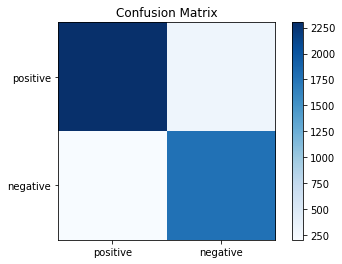

In [124]:
plot_confusion_matrix(cm)

### Passive Aggressive Classifier Algorithm

In [125]:
#this algo works well with text data and is basica0lly used for text data

In [126]:
from sklearn.linear_model import PassiveAggressiveClassifier

In [127]:
linear_clf=PassiveAggressiveClassifier()

In [128]:
linear_clf.fit(X_train,y_train)

PassiveAggressiveClassifier()

In [129]:
predictions=linear_clf.predict(X_test)

In [130]:
metrics.accuracy_score(y_test,predictions)

0.9096675415573053

In [131]:
cm2=metrics.confusion_matrix(y_test,predictions)
cm2

array([[2357,  243],
       [ 170, 1802]])

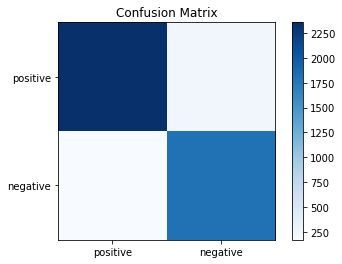

In [132]:
plot_confusion_matrix(cm2)

In [133]:
## Get Features names
#to detect which fake and which is most real word

feature_names=cv.get_feature_names()

/home/jessica/ENTER/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [136]:
classifier.coef_

array([[ -8.86060051,  -8.60928608,  -9.19707274, ..., -10.80651066,
         -8.72706912,  -9.4202163 ]])

In [134]:
#most negative value is most fake word,if we go towards lower value in -ve,ie we have most fake value
classifier.coef_[0]

/home/jessica/ENTER/lib/python3.7/site-packages/sklearn/utils/deprecation.py:103: FutureWarning: Attribute `coef_` was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)


array([ -8.86060051,  -8.60928608,  -9.19707274, ..., -10.80651066,
        -8.72706912,  -9.4202163 ])

In [135]:
### Most 20 real values
sorted(zip(classifier.coef_[0],feature_names),reverse=True)[0:20]

[(-3.9648951809317863, 'trump'),
 (-4.272721819476034, 'hillari'),
 (-4.368759007672977, 'clinton'),
 (-4.861090048802803, 'elect'),
 (-5.219261999009128, 'new'),
 (-5.230561554263062, 'comment'),
 (-5.269176390390841, 'video'),
 (-5.355472203843678, 'war'),
 (-5.372788653855138, 'hillari clinton'),
 (-5.394864605554338, 'us'),
 (-5.412883111057016, 'fbi'),
 (-5.483500678270969, 'vote'),
 (-5.483500678270969, 'email'),
 (-5.559486585248892, 'obama'),
 (-5.570068694579429, 'world'),
 (-5.718914322176994, 'donald'),
 (-5.743915624382411, 'donald trump'),
 (-5.8229040357010415, 'russia'),
 (-5.864868234800074, 'presid'),
 (-5.872036724278686, 'america')]